In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [31]:
df = pd.read_csv("House price.csv")
df.head()

,Date,Geo,Type,Price
0,2005-01-01,Vancouver_Island,Composite_Benchmark,189900
1,2005-02-01,Vancouver_Island,Composite_Benchmark,193800
2,2005-03-01,Vancouver_Island,Composite_Benchmark,197800
3,2005-04-01,Vancouver_Island,Composite_Benchmark,201800
4,2005-05-01,Vancouver_Island,Composite_Benchmark,205900


In [32]:
dftrain , dftest = train_test_split(df , test_size  = .1 ,random_state = 42)
print(dftrain.shape)
print(dftest.shape)

(39877, 4)
(4431, 4)


In [33]:
def training_preprocessing(train_data):
    
    replace_dict = {"Composite_Benchmark" : 1 , "Single_Family_Benchmark": 2 ,
                "One_Storey_Benchmark" : 3 , "Two_Storey_Benchmark" : 4}
    
    
    dftrain["Type"].replace(replace_dict , inplace =True)
    ohe = OneHotEncoder()
    ohe_data = ohe.fit_transform(train_data[["Geo"]])
    train_data[ ohe.categories_[0]] = ohe_data.toarray()
    train_data["year"] = [i.split("-")[0] for i in train_data["Date"]]
    train_data["month"] = [i.split("-")[1] for i in train_data["Date"]]
    train_data.drop(columns =["Date","Geo"] ,inplace =  True)
    Xtrain = train_data.drop(columns = "Price")
    ytrain = train_data["Price"]
    ytrain = np.log10(ytrain)
    
    return Xtrain , ytrain ,ohe

    
    

In [34]:
def testing_preprocessing(test_data , ohe):
    
    replace_dict = {"Composite_Benchmark" : 1 , "Single_Family_Benchmark": 2 ,
                "One_Storey_Benchmark" : 3 , "Two_Storey_Benchmark" : 4}
    
    
    test_data["Type"].replace(replace_dict , inplace =True)
    ohe_data_test = ohe.transform(test_data[["Geo"]])
    test_data[ ohe.categories_[0]] = ohe_data_test.toarray()
    test_data["year"] = [i.split("-")[0] for i in test_data["Date"]]
    test_data["month"] = [i.split("-")[1] for i in test_data["Date"]]
    test_data.drop(columns =["Date","Geo"] ,inplace =  True)
    Xtest = test_data.drop(columns = "Price")
    ytest = test_data["Price"]
    ytest = np.log10(ytest)
    
    return Xtest , ytest
    

    

In [35]:
def creat_model(Xtrain , ytrain , Xtest , ytest):
    
    svmrg = SVR(kernel= "rbf" , C = 200 ,gamma = .01)
    svmrg.fit(Xtrain , ytrain)
    ypred = svmrg.predict(Xtest)
    print("r2 score" , svmrg.score(Xtest,ytest))
    fig = plt.figure(figsize = (20,10))
    plt.plot(range(len(ypred[:100])),10**ytest.values[:100] , label ="actual" )
    plt.plot(range(len(ypred[:100])),10**ypred[:100] , label ="prediction" )

    plt.legend()
    
    return svmrg
    

In [36]:
Xtrain , ytrain , ohe = training_preprocessing(dftrain)
Xtest , ytest = testing_preprocessing(dftest ,ohe)

r2 score 0.9589991951366811


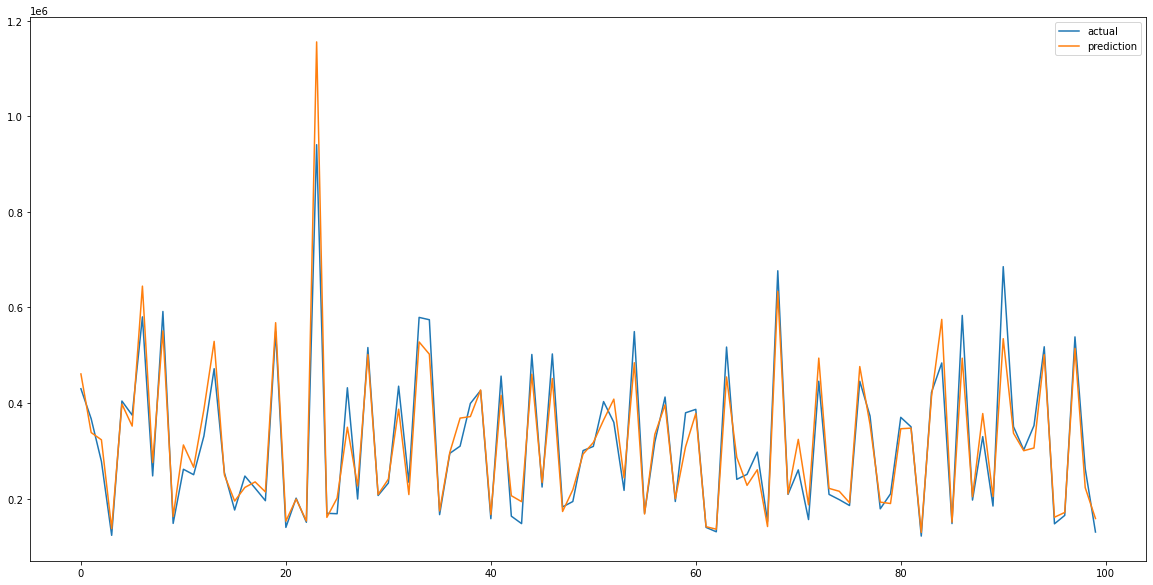

In [37]:
model = creat_model(Xtrain , ytrain , Xtest , ytest)